In [17]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

#Import time library and the datetime module from the datetime 
import time
from datetime import datetime

In [18]:
# Creat ea set of random latitude and longitude combos
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

# pack the lattitudes and longistudes as pairs by zipping them (connect them together)
lat_lngs = zip(lats, lngs)
lat_lngs

In [19]:
# Add lats and longs to a list
coordinates = list(lat_lngs)

In [20]:
from citipy import citipy

In [21]:
# Create a list to hold the cities
cities = []

#identify the enarest city for each lat and long combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, add it to the list
    if city not in cities:
        cities.append(city)
# Print the city count ot confirm sufficient count
len(cities)

651

In [22]:
#Build the URL with your weather api key
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:
# Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through the list of cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes and pause for 60 seconds every set of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count
    record_count += 1
    
#Run an API request for each of the cities with try and except block
    try:
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #conver the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information to the city data list
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

#If an error occurs, skip the city
    except:
        print("city not found. Skipping...")
        pass
    
#Indicate that data loading is complete
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | santa cruz del sur
Processing Record 2 of Set 1 | baijiantan
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | mizdah
Processing Record 8 of Set 1 | alma
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | anadyr
Processing Record 11 of Set 1 | aravissos
Processing Record 12 of Set 1 | bentiu
Processing Record 13 of Set 1 | acajutla
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vaitupu
city not found. Skipping...
Processing Record 20 of Set 1 | hope
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | guerrero negro
Pro

Processing Record 36 of Set 4 | vila franca do campo
Processing Record 37 of Set 4 | hami
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | santa rosa
Processing Record 40 of Set 4 | mubi
Processing Record 41 of Set 4 | foix
Processing Record 42 of Set 4 | ruteng
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | buzmeyin
Processing Record 46 of Set 4 | horsham
Processing Record 47 of Set 4 | alyangula
Processing Record 48 of Set 4 | nantucket
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | antofagasta
Processing Record 1 of Set 5 | bukama
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | atar
Processing Record 4 of Set 5 | moindou
Processing Record 5 of Set 5 | matara
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | pringsewu
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | chupaca
Processing Record 10 of Set 

Processing Record 27 of Set 8 | casper
Processing Record 28 of Set 8 | vilhena
Processing Record 29 of Set 8 | termoli
Processing Record 30 of Set 8 | bagotville
Processing Record 31 of Set 8 | staryy biser
city not found. Skipping...
Processing Record 32 of Set 8 | harnosand
Processing Record 33 of Set 8 | muriwai beach
Processing Record 34 of Set 8 | bilibino
Processing Record 35 of Set 8 | buchanan
Processing Record 36 of Set 8 | lokomotivnyy
Processing Record 37 of Set 8 | tarbagatay
Processing Record 38 of Set 8 | mrirt
city not found. Skipping...
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | arti
Processing Record 41 of Set 8 | marquette
Processing Record 42 of Set 8 | paso de los toros
Processing Record 43 of Set 8 | boyolangu
Processing Record 44 of Set 8 | chambersburg
Processing Record 45 of Set 8 | san jose
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | huarmey
Processing Recor

city not found. Skipping...
Processing Record 16 of Set 12 | yirol
city not found. Skipping...
Processing Record 17 of Set 12 | asosa
Processing Record 18 of Set 12 | haines junction
Processing Record 19 of Set 12 | fort collins
Processing Record 20 of Set 12 | upata
Processing Record 21 of Set 12 | russell
Processing Record 22 of Set 12 | guiratinga
Processing Record 23 of Set 12 | caxito
Processing Record 24 of Set 12 | pasni
Processing Record 25 of Set 12 | nizhnevartovsk
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | yokadouma
Processing Record 28 of Set 12 | pocone
Processing Record 29 of Set 12 | nanortalik
Processing Record 30 of Set 12 | cheney
Processing Record 31 of Set 12 | samarai
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | nishihara
Processing Record 34 of Set 12 | tortoli
Processing Record 35 of Set 12 | seydi
Processing Record 36 of Set 12 | alugan
Processing Record 37 of Set 12 | chagda
city not found. Skipping.

In [25]:
# Convert the array of dictinaries above to a pandas DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz Del Sur,20.7147,-77.9956,71.37,70,2,9.69,CU,2022-01-26 04:11:25
1,Baijiantan,45.6333,85.1833,7.41,88,82,1.32,CN,2022-01-26 04:11:26
2,Mataura,-46.1927,168.8643,49.53,98,100,7.34,NZ,2022-01-26 04:11:27
3,Butaritari,3.0707,172.7902,81.88,79,31,16.73,KI,2022-01-26 04:11:27
4,Bredasdorp,-34.5322,20.0403,66.27,90,100,7.92,ZA,2022-01-26 04:11:28


In [26]:
#re assign columns:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Cruz Del Sur,CU,2022-01-26 04:11:25,20.7147,-77.9956,71.37,70,2,9.69
1,Baijiantan,CN,2022-01-26 04:11:26,45.6333,85.1833,7.41,88,82,1.32
2,Mataura,NZ,2022-01-26 04:11:27,-46.1927,168.8643,49.53,98,100,7.34
3,Butaritari,KI,2022-01-26 04:11:27,3.0707,172.7902,81.88,79,31,16.73
4,Bredasdorp,ZA,2022-01-26 04:11:28,-34.5322,20.0403,66.27,90,100,7.92


In [27]:
# Add DF to a csv file 
output_data_file = "weather_data/cities.csv"

#Export the city_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

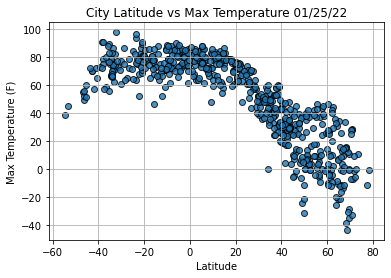

In [33]:
# extract relevant field froms the data frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#import time module
import time

#build the scatter plots for lat vs max temp
plt.scatter(lats, max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

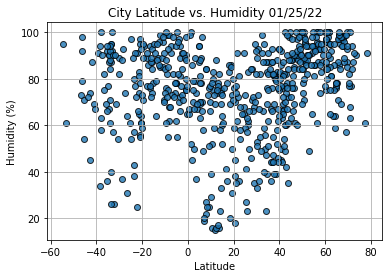

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

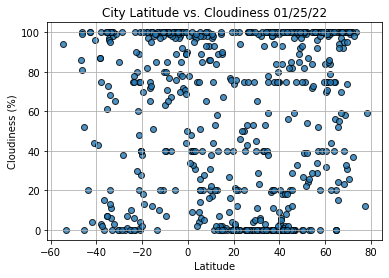

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

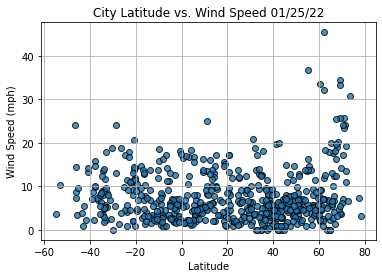

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()